# PIPELINE WITH MODEL 4, DATASET V3 (https://universe.roboflow.com/sidsproject/back_stomach_123_merged-xxmxb/dataset/1), DIFFERENT TYPES OF EMBEDDINGS

## PIPELINE
### 1. load model face_detection
### 2. create embeddings
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

## 1. load the model face_detection
Step 1 is the same for each pipeline, so we do it once at the beginning.

**Import dependencies**

In [1]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message="pkg_resources is deprecated as an API"
)

In [2]:
%load_ext autoreload
%autoreload 2

from libraries.embeddings_utils import *
import ipynbname
from libraries.retrieval_utils import *
from libraries.classifier_utils import *
from libraries.file_manager_utils import *

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/1.pe_weights/best.pt"

**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [2]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load",weights_path_pe=model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


---
# EMBEDDING flag

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [3]:
embeddings = emb_builder.create_embedding(flags=True,positions=True,geometric_info=True,k_geometric_info=True,positions_normalized=True,k_positions_normalized=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [4]:
embeddings.head(10)

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,elbow_shoulder_hip_left,shoulder_elbow_wrist_right,shoulder_elbow_wrist_left,shoulder_hip_knee_right,shoulder_hip_knee_left,hip_knee_ankle_right,hip_knee_ankle_left,shoulders_line_inclination,hips_line_inclination,torsion
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,65.957223,140.114146,171.282021,-1.000000,-1.000000,-1.000000,-1.000000,130.968001,139.873877,8.905877
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,48.235362,71.237262,54.220079,109.018907,159.966822,82.789333,122.917424,102.408189,100.971122,1.437068
2,1,1,1,1,0.840597,0.670866,0.851189,0.554131,0.822311,0.610625,...,80.932845,71.173304,125.333338,177.052022,107.897367,136.088183,65.045912,96.656832,103.390339,6.733508
3,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,43.725505,151.968785,167.426252,146.577193,135.704561,163.339600,148.915233,12.555441,19.196181,6.640740
5,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,56.278019,164.110494,141.398331,98.090642,103.193973,84.889438,96.917890,-88.637665,-90.494937,1.857272
6,1,1,1,0,0.458528,0.588272,0.407624,0.585720,0.426681,0.612870,...,50.965655,145.611460,147.778965,91.058117,75.364360,83.441298,115.949327,176.960404,-160.665809,337.626213
7,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,70.988882,36.629266,99.533570,146.049269,83.771312,102.924254,47.060852,94.246163,92.854240,1.391923
8,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,100.751858,92.528228,100.648998,153.067511,156.857613,161.595257,145.844881,88.795412,88.872520,0.077108
9,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,27.115125,174.316931,142.558146,139.007061,150.558225,144.874023,157.704630,14.101910,-4.577495,18.679404


## 3. Retrieval to evaluate embedding goodness

In [5]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
print(ret.embeddings_norm)
#ret.report("euclidean")


[[          0           0           0 ...     0.42663     0.45564    0.029011]
 [          0           0           0 ...     0.33186      0.3272   0.0046569]
 [  0.0025916   0.0025916   0.0025916 ...     0.25049     0.26794     0.01745]
 ...
 [  0.0032479           0           0 ...     0.20513     0.19934   0.0057839]
 [          0           0           0 ...    -0.50835     -0.5237    0.015348]
 [          0           0           0 ...     0.16326     0.16758   0.0043149]]


## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this pack

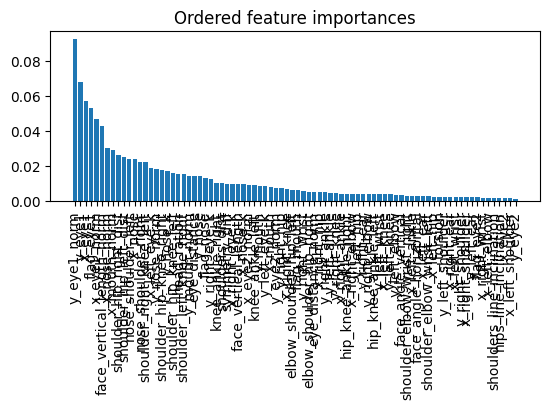

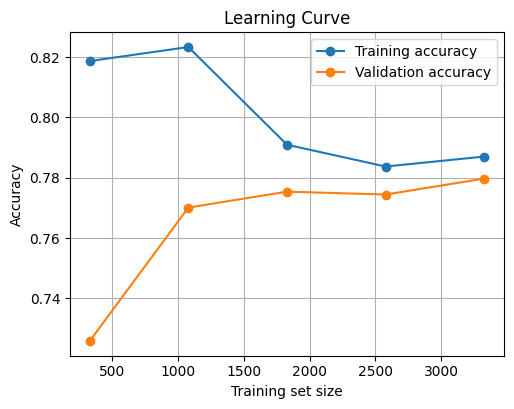


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.68      0.77       437
 baby_unsafe       0.72      0.89      0.79       395

    accuracy                           0.78       832
   macro avg       0.79      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


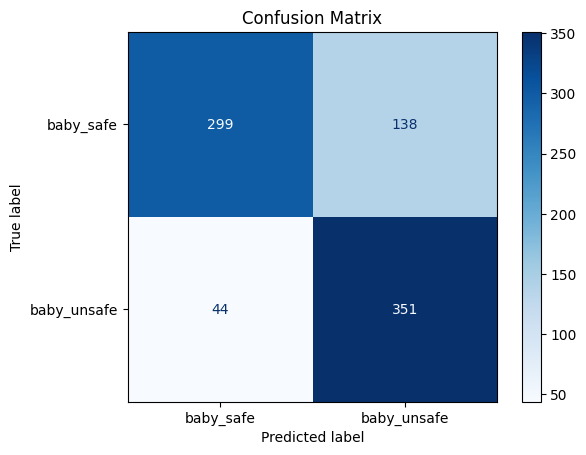

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


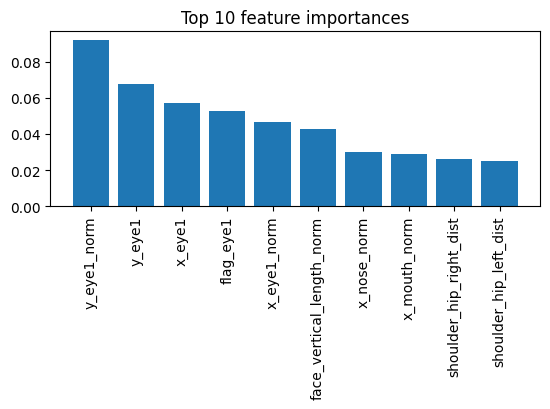

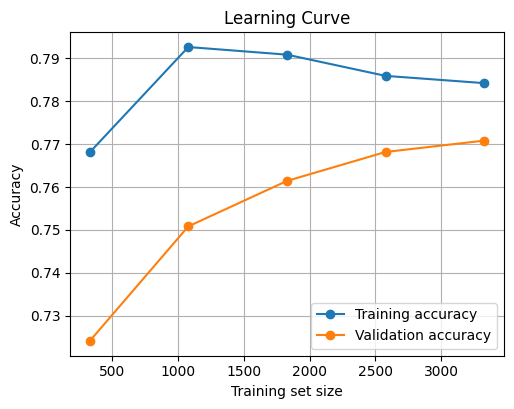


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.69      0.76       437
 baby_unsafe       0.71      0.87      0.78       395

    accuracy                           0.77       832
   macro avg       0.78      0.78      0.77       832
weighted avg       0.79      0.77      0.77       832

Confusion matrix---------------------------------------


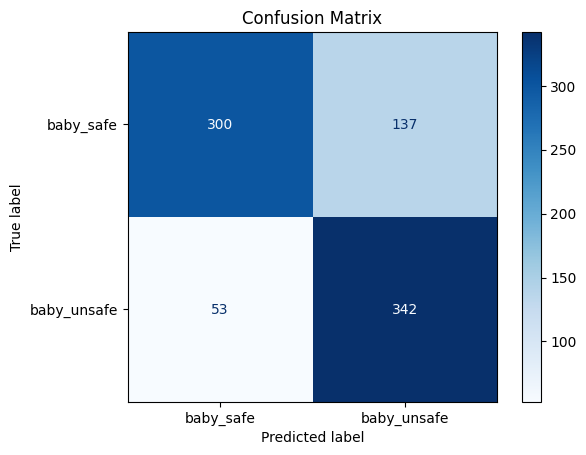

(RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                        n_estimators=300),
 {'all_features': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                          n_estimators=300),
   'X': array([[          0,           0,           0, ...,      130.97,      139.87,      8.9059],
          [          0,           0,           0, ...,      102.41,      100.97,      1.4371],
          [          1,           1,           1, ...,      96.657,      103.39,      6.7335],
          ...,
          [          1,           0,           0, ...,      63.156,      61.376,      1.7808],
          [          0,           0,           0, ...,     -168.48,     -173.57,      5.0869],
          [          0,           0,           0, ...,      58.283,      59.824,      1.5404]]),
   'y': array([0, 1, 0, ..., 0, 1, 1])},
  'top_10_features': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_

In [4]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [10]:
embeddings = emb_builder.create_embedding(flags=True,positions=True,geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------


In [11]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.395011
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.837183
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.84086,0.27549,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


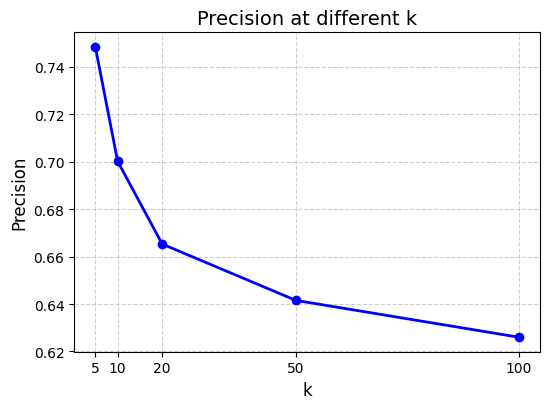


Recall at R-------------------------------------------------------------------------------
0.5531558104196472

Silhouette score--------------------------------------------------------------------------

Embeddings distributions------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: divide by zero encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: overflow encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: invalid value encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_


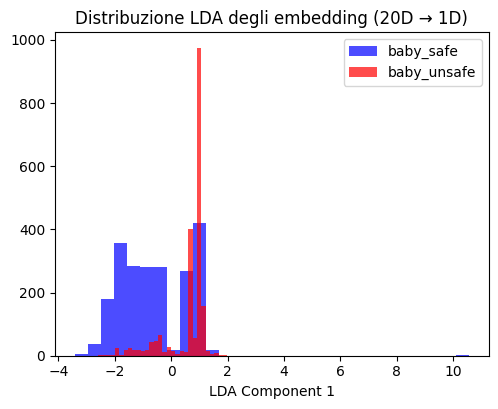

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normaliz

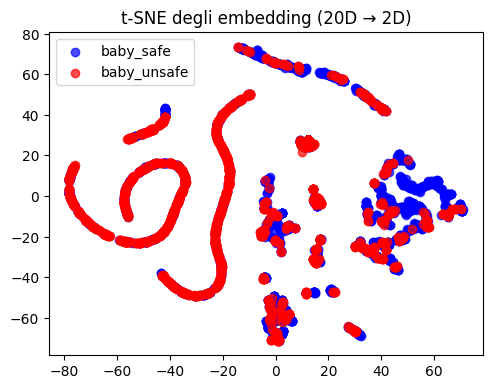

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


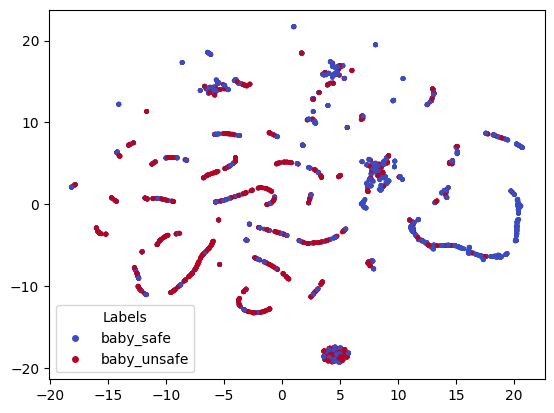

In [12]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


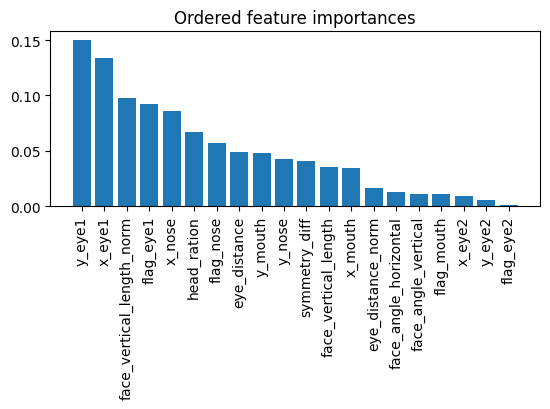

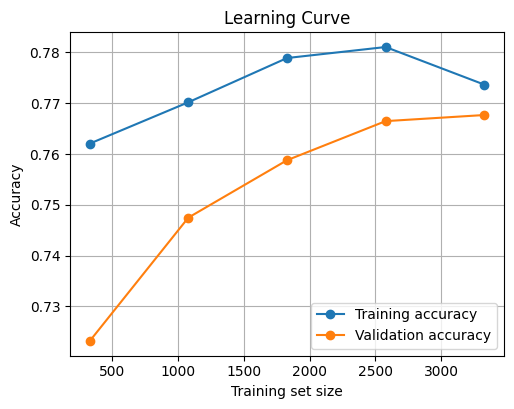


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.82      0.68      0.74       426
 baby_unsafe       0.71      0.84      0.77       406

    accuracy                           0.76       832
   macro avg       0.76      0.76      0.76       832
weighted avg       0.77      0.76      0.75       832

Confusion matrix---------------------------------------


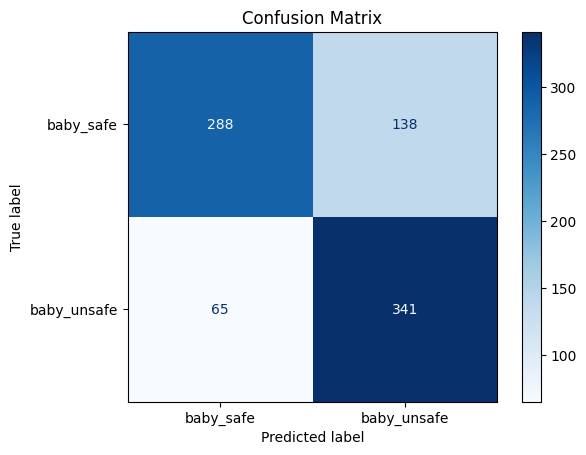

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


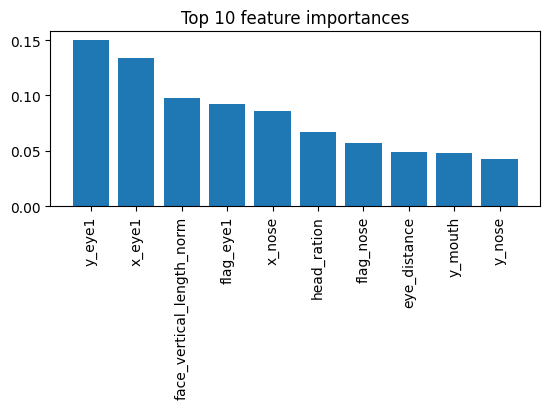

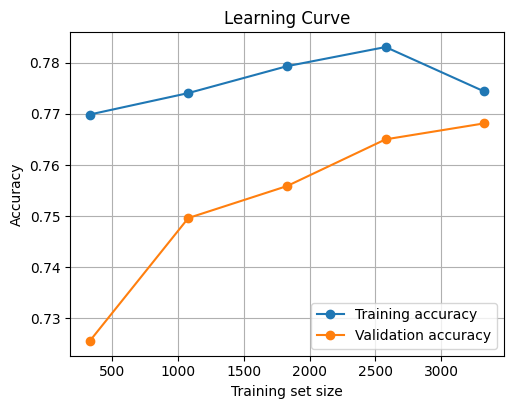


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.83      0.67      0.74       426
 baby_unsafe       0.71      0.85      0.77       406

    accuracy                           0.76       832
   macro avg       0.77      0.76      0.76       832
weighted avg       0.77      0.76      0.76       832

Confusion matrix---------------------------------------


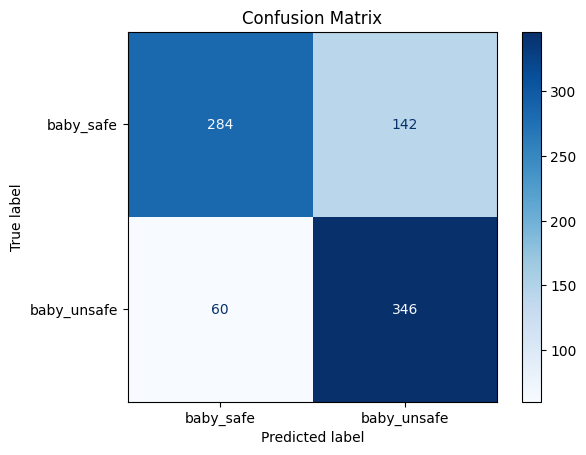

(RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                        n_estimators=300),
 {'all_features': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                          n_estimators=300),
   'X': array([[          0,           0,           0, ...,          -1,           0,      1.2923],
          [          0,           0,           0, ...,          -1,           0,       1.395],
          [          0,           0,           0, ...,          -1,           0,          -1],
          ...,
          [          1,           1,           1, ...,      126.52,    0.051653,     0.54986],
          [          1,           1,           1, ...,       106.6,   0.0070473,      1.2687],
          [          0,           0,           0, ...,          -1,           0,     0.55159]]),
   'y': array([1, 0, 1, ..., 0, 0, 1])},
  'top_10_features': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_

In [15]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features normalized

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [16]:
embeddings = emb_builder.create_embedding(flags=True,positions=True,geometric_info=True,positions_normalized=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration']
FINISHED: 4158 embedding created
------------------------------------------------------------------------------------------


In [17]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.519790,-1.998541,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.395011
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,...,-6.005907,-1.195665,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.837183
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.27549,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


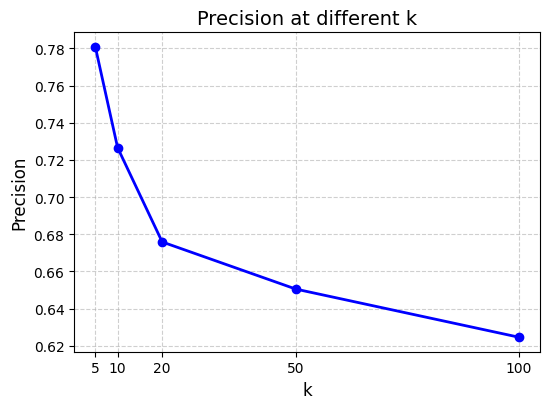


Recall at R-------------------------------------------------------------------------------
0.5497548436023189

Silhouette score--------------------------------------------------------------------------

Embeddings distributions------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: divide by zero encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: overflow encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:756: RuntimeWarning: invalid value encountered in matmul
  X_new = (X - self.xbar_) @ self.scalings_


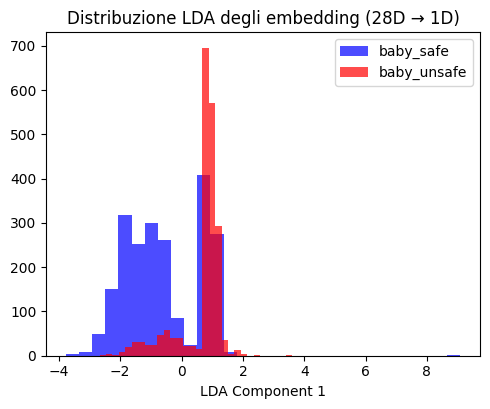

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normaliz

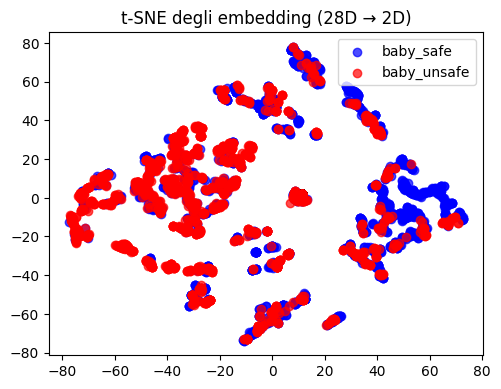

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


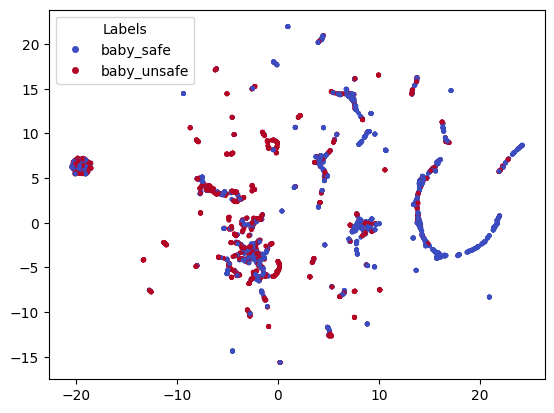

In [18]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

In [33]:
save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/pipeline_dataset_v3.ipynb to pdf
[NbConvertApp] Support files will be in /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/pipeline_dataset_v3(2025-09-01)_files/
[NbConvertApp] Writing 24611185 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 9248792 bytes to /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/pipeline_dataset_v3(2025-09-01).pdf
